# Transactions analysis

In [37]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [13]:
file_path = "/Users/alipuccio/Desktop/apex/Venmito-apekshamalik/output_data/transactions_(linked).csv"
transactions_df = pd.read_csv(file_path)

In [14]:
display(transactions_df.head())

,transaction_id,phone,store,items,person_id
0,1000,233-159-4158,Trader Tales,"['Krafty Cheddar (x1)', 'Popsi (x1)', 'Oreoz (...",854
1,1001,725-427-2794,PetPals Mart,['Colgatex (x1)'],341
2,1002,659-190-9378,Trader Tales,"['Colgatex (x1)', 'Dovee (x1)', 'Flixnet (x1)']",15
3,1003,334-436-6254,Urban Outfitters Loft,"['Krafty Cheddar (x2)', 'RedCow (x1)', 'Dovee ...",371
4,1004,615-102-4849,PetPals Mart,"['Popsi (x1)', 'Flixnet (x1)']",480


In [15]:
print(transactions_df["items"].head(10))  # See the first 10 values
print(type(transactions_df["items"].iloc[0]))  # Check the type of the first row

0    ['Krafty Cheddar (x1)', 'Popsi (x1)', 'Oreoz (...
1                                    ['Colgatex (x1)']
2      ['Colgatex (x1)', 'Dovee (x1)', 'Flixnet (x1)']
3    ['Krafty Cheddar (x2)', 'RedCow (x1)', 'Dovee ...
4                       ['Popsi (x1)', 'Flixnet (x1)']
5                      ['Popsi (x1)', 'KittyKat (x2)']
6                    ['Flixnet (x1)', 'Colgatex (x2)']
7       ['KittyKat (x2)', 'RedCow (x1)', 'Dovee (x3)']
8    ['Colgatex (x1)', 'RedCow (x1)', 'KittyKat (x1)']
9                              ['Krafty Cheddar (x1)']
Name: items, dtype: object
<class 'str'>


In [16]:
transactions_df["items"] = transactions_df["items"].apply(ast.literal_eval)

In [17]:
transactions_df = transactions_df.explode("items")

In [18]:
print(transactions_df.head(10))

   transaction_id         phone                  store                items  \
0            1000  233-159-4158           Trader Tales  Krafty Cheddar (x1)   
0            1000  233-159-4158           Trader Tales           Popsi (x1)   
0            1000  233-159-4158           Trader Tales           Oreoz (x2)   
1            1001  725-427-2794           PetPals Mart        Colgatex (x1)   
2            1002  659-190-9378           Trader Tales        Colgatex (x1)   
2            1002  659-190-9378           Trader Tales           Dovee (x1)   
2            1002  659-190-9378           Trader Tales         Flixnet (x1)   
3            1003  334-436-6254  Urban Outfitters Loft  Krafty Cheddar (x2)   
3            1003  334-436-6254  Urban Outfitters Loft          RedCow (x1)   
3            1003  334-436-6254  Urban Outfitters Loft           Dovee (x2)   

   person_id  
0        854  
0        854  
0        854  
1        341  
2         15  
2         15  
2         15  
3        3

In [19]:
best_sellers = transactions_df["items"].value_counts().reset_index()
best_sellers.columns = ['Item', 'Count']


# Reformat to extract and remove quantity amounts

In [20]:
transactions_df["item_clean"] = transactions_df["items"].str.extract(r'(.+) \(x\d+\)')
transactions_df["quantity"] = transactions_df["items"].str.extract(r'x(\d+)').astype(float)

# Best sellers dataframe cleaned and formatted in descending order

In [21]:
best_sellers = transactions_df.groupby("item_clean")["quantity"].sum().reset_index()
best_sellers = best_sellers.sort_values(by="quantity", ascending=False)

# Best 10 selling items

In [22]:
display(best_sellers.head(10))

,item_clean,quantity
2,Dovee,96.0
9,RedCow,66.0
8,Popsi,58.0
1,Colgatex,58.0
3,Flixnet,50.0
5,KittyKat,46.0
6,Krafty Cheddar,30.0
7,Oreoz,28.0
4,GatorBoost,17.0
0,Coca-Splash,2.0


# Format for best 10 and handling NaN

In [23]:
transactions_df["item_clean"] = transactions_df["items"].str.extract(r'(.+?) \(x\d+\)')
transactions_df["quantity"] = transactions_df["items"].str.extract(r'x(\d+)').astype(float)

transactions_df["quantity"].fillna(1, inplace=True)

/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_37845/1222971556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df["quantity"].fillna(1, inplace=True)


In [24]:
store_sales = transactions_df.groupby("store")["quantity"].sum().reset_index().sort_values(by="quantity", ascending=False)

# Stores with the highest sales display

In [25]:
display(store_sales.head(10))

,store,quantity
5,Urban Outfitters Loft,134.0
4,Trader Tales,109.0
1,PetPals Mart,99.0
0,BestChoice Buy,57.0
2,SparkMart,44.0
3,Targeted Treasures,8.0


In [27]:
print(transactions_df.columns)


Index(['transaction_id', 'phone', 'store', 'items', 'person_id', 'item_clean',
       'quantity'],
      dtype='object')


/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_37845/1769665826.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_counts, x='Store', y='Transaction Count', palette='Set2')


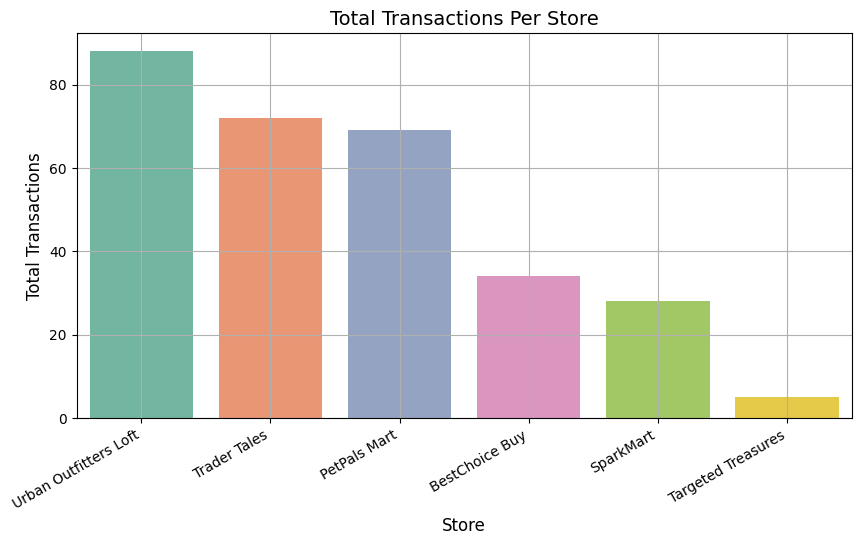

/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_37845/1769665826.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "quantity"))


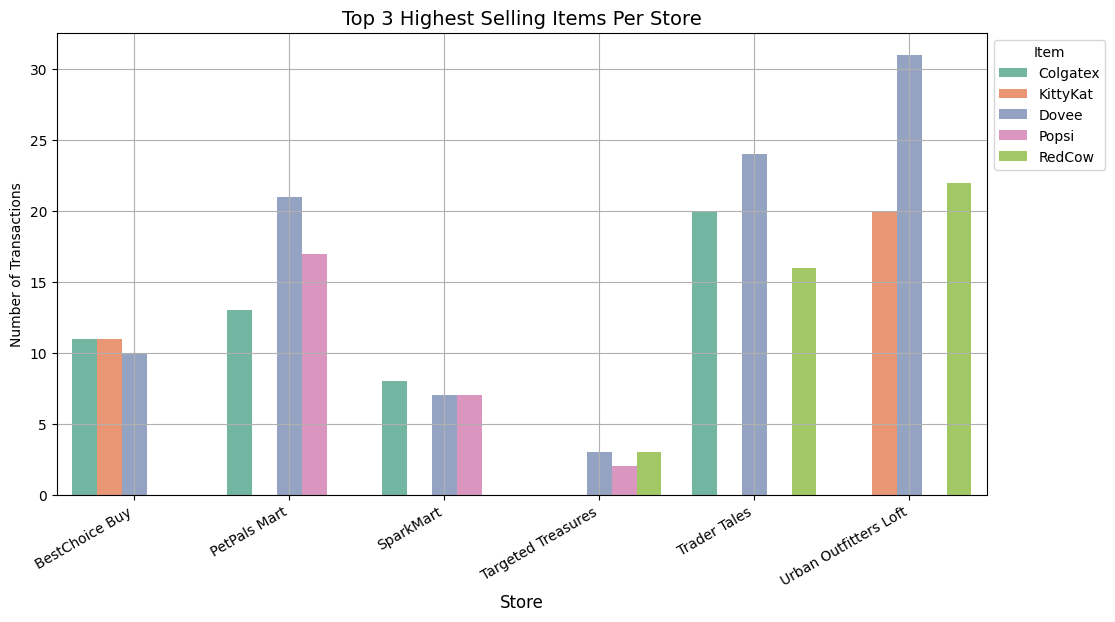

/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_37845/1769665826.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(3, "quantity"))


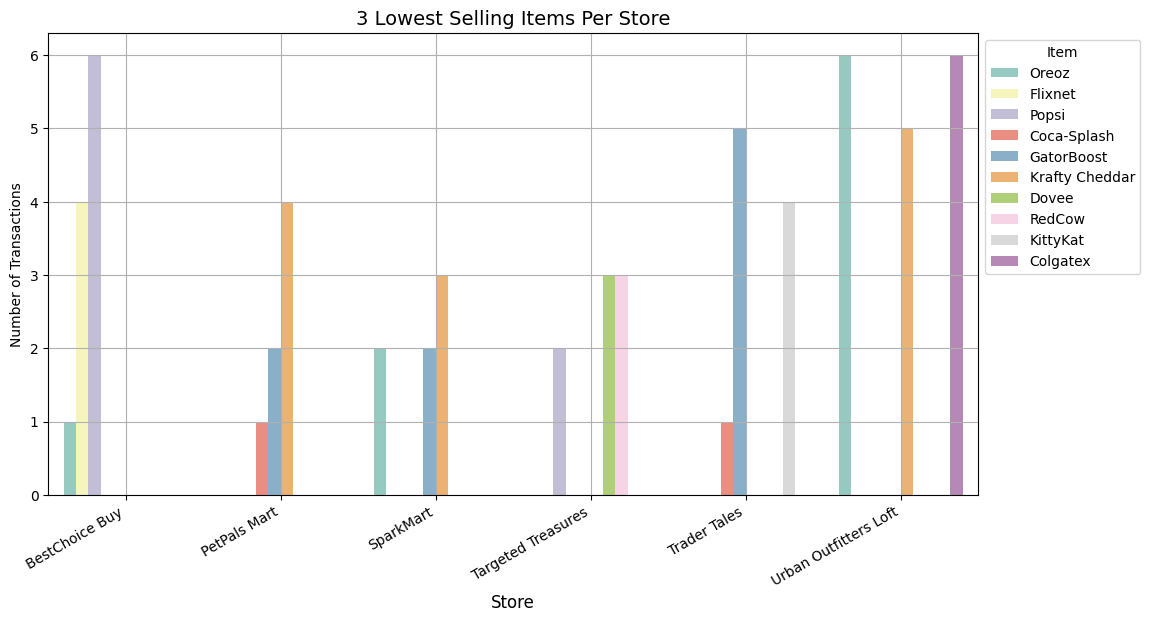

In [43]:

# Function to extract item name and quantity
def extract_item_and_quantity(item_str):
    match = re.match(r"(.*) \(x(\d+)\)", item_str)
    if match:
        item_name, quantity = match.groups()
        return item_name.strip(), int(quantity)
    return item_str.strip(), 1  # Default to 1 if no quantity is specified

# Ensure items are processed correctly
def process_items_column(items):
    if isinstance(items, list):  # If already a list, return as is
        return items
    if isinstance(items, str):  # If a string, clean and split
        return items.strip("[]").replace("'", "").split(", ")
    return []  # If NaN or invalid, return an empty list

# Apply function to fix the items column
transactions_df['items'] = transactions_df['items'].apply(process_items_column)

# Explode items into separate rows
transactions_exploded = transactions_df.explode('items')

# Extract clean item names and their quantities
transactions_exploded[['item_name', 'quantity']] = transactions_exploded['items'].apply(lambda x: pd.Series(extract_item_and_quantity(x)))

# Aggregate transactions correctly by summing up the quantities
store_item_counts = transactions_exploded.groupby(['store', 'item_name'])['quantity'].sum().reset_index()

### **🔹 Total Transactions Per Store**
store_counts = transactions_exploded['store'].value_counts().reset_index()
store_counts.columns = ['Store', 'Transaction Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=store_counts, x='Store', y='Transaction Count', palette='Set2')
plt.xlabel("Store", fontsize=12)
plt.ylabel("Total Transactions", fontsize=12)
plt.title("Total Transactions Per Store", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.grid(True)
plt.show()

### **🔹 Top 3 Highest Selling Items Per Store**
top_items_per_store = (
    store_item_counts.groupby("store")
    .apply(lambda x: x.nlargest(3, "quantity"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_items_per_store, x='store', y='quantity', hue='item_name', palette='Set2')
plt.xlabel("Store", fontsize=12)
plt.ylabel("Number of Transactions")
plt.title("Top 3 Highest Selling Items Per Store", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Item", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

### **🔹 Top 3 Lowest Selling Items Per Store**
lowest_items_per_store = (
    store_item_counts.groupby("store")
    .apply(lambda x: x.nsmallest(3, "quantity"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_items_per_store, x='store', y='quantity', hue='item_name', palette='Set3')
plt.xlabel("Store", fontsize=12)
plt.ylabel("Number of Transactions")
plt.title("3 Lowest Selling Items Per Store", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Item", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
